## Constants Define

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
dataset_outdim = {'cifar10':10, 'cifar100':100,'imagenet':1000}
data_real_name = {'cifar10':'CIFAR10', 'cifar100':'CIFAR100','imagenet':'ImageNet-1K'}
model_real_name = {'resnet':'ResNet101', 'vit':'ViT-B/16'}
flops_dict = dict()
acc_dict = dict()

resnet_cifar10_acc = [64.47, 72.24, 81.45, 84.25, 86.01, 90.24, 92.6, 94.31, 95.77, 95.08, 97.52]
resnet_cifar100_acc = [37.8, 44.83, 60.08, 67.39, 72.1, 74.34, 77.32, 79.9, 80.94, 83.05, 86.24]
resnet_imagenet_acc = [28.278, 35.742, 51.206, 54.662, 60.53, 63.732, 67.158, 70.394, 73.672, 79.374, 80.888]
vit_cifar10_acc = [72.76, 80.35, 85.8, 89.42, 91.98, 93.12, 94.94, 96.44, 96.95, 97.35, 97.63]
vit_cifar100_acc = [48.21, 59.63, 67.93, 73.31, 77.9, 80.8, 83.71, 85.33, 86.61, 87.04, 87.75]
vit_imagenet_acc = [34.76, 42.65, 51.82, 57.76, 62.19, 65.5, 69.29, 72.3, 75.3, 77.6, 81.06]

resnet_cifar10_flops = [1412860928, 2076990464, 2890800128, 3550413824, 4210027520, 4869641216, 5529254912, 6188868608, 6848482304, 7661519360, 7880637952]
resnet_cifar100_flops = [1412907008, 2077036544, 2890892288, 3550505984, 4210119680, 4869733376, 5529347072, 6188960768, 6848574464, 7661703680, 7880822272]
resnet_imagenet_flops = [1413367808, 2077497344, 2891813888, 3551427584, 4211041280, 4870654976, 5530268672, 6189882368, 6849496064, 7663546880, 7882665472]
vit_cifar10_flops = [2908083456, 4303940352, 5699797248, 7095654144, 8491511040, 9887367936, 11283224832, 12679081728, 14074938624, 15470795520, 16866652416]
vit_cifar100_flops = [2908152576, 4304009472, 5699866368, 7095723264, 8491580160, 9887437056, 11283293952, 12679150848, 14075007744, 15470864640, 16866721536]
vit_imagenet_flops= [2908843776, 4304700672, 5700557568, 7096414464, 8492271360, 9888128256, 11283985152, 12679842048, 14075698944, 15471555840, 16867412736]

########### Data -> dict
flops_dict['resnet_cifar10'] = resnet_cifar10_flops;flops_dict['resnet_cifar100'] = resnet_cifar100_flops;flops_dict['resnet_imagenet'] = resnet_imagenet_flops
flops_dict['vit_cifar10'] = vit_cifar10_flops;flops_dict['vit_cifar100'] = vit_cifar100_flops;flops_dict['vit_imagenet'] = vit_imagenet_flops
acc_dict['resnet_cifar10'] = resnet_cifar10_acc;acc_dict['resnet_cifar100'] = resnet_cifar100_acc;acc_dict['resnet_imagenet'] = resnet_imagenet_acc
acc_dict['vit_cifar10'] = vit_cifar10_acc;acc_dict['vit_cifar100'] = vit_cifar100_acc;acc_dict['vit_imagenet'] = vit_imagenet_acc

## CIFAR-10

In [39]:
data_choice = 'cifar10'
model_choice = 'resnet'

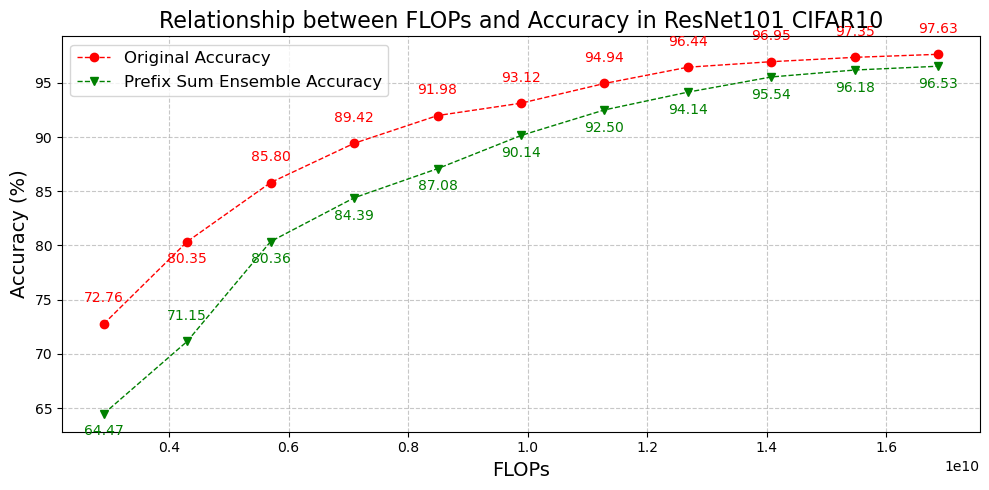

In [40]:
cache_path = f'cache_exp_{model_choice}_{data_choice}.pt'
cache_exp = torch.load(cache_path)
#cache_exp.keys() ->dict_keys(['prefix_sum_ensemble_acc', 'static_ensemble_acc', 'Dynamic_No_Scaling', 'choosen_exit_distribution', 'Dynamic_TS_Scaling', 'exits_precision', 'Dynamic_MS_Scaling'])

prefix_sum_ensemble_acc = cache_exp['prefix_sum_ensemble_acc']

# Plot FLOPs vs Accuracy
plt.figure(figsize=(10, 5))

# Plot origin accuracy
plt.plot(flops_dict[f'{model_choice}_{data_choice}'], acc_dict[f'{model_choice}_{data_choice}'], marker='o', markersize=6, linestyle='--', linewidth=1, color='red', label="Original Accuracy")
# Add data labels for origin accuracy
offset = 2  # Alternate label positions
text_label_size = 10
for i, (flop, acc) in enumerate(zip(flops_dict[f'{model_choice}_{data_choice}'], acc_dict[f'{model_choice}_{data_choice}'])):
    tmp_offset = -1 if i == 1 else 1
    plt.text(flop, acc + offset * tmp_offset, f"{acc:.2f}", fontsize=text_label_size, ha='center', color='red')

# Plot prefix sum ensemble accuracy
plt.plot(flops_dict[f'{model_choice}_{data_choice}'], prefix_sum_ensemble_acc, marker='v', markersize=6, linestyle='--', linewidth=1, color='green', label="Prefix Sum Ensemble Accuracy")
# Add data labels for prefix sum ensemble accuracy
for i, (flop, acc) in enumerate(zip(flops_dict[f'{model_choice}_{data_choice}'], prefix_sum_ensemble_acc)):
    tmp_offset = -1 if i == 1 else 1
    plt.text(flop, acc - offset * tmp_offset, f"{acc:.2f}", fontsize=text_label_size, ha='center', color='green')

# Titles and labels
plt.title(f"Relationship between FLOPs and Accuracy in {model_real_name[model_choice]} {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("FLOPs", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

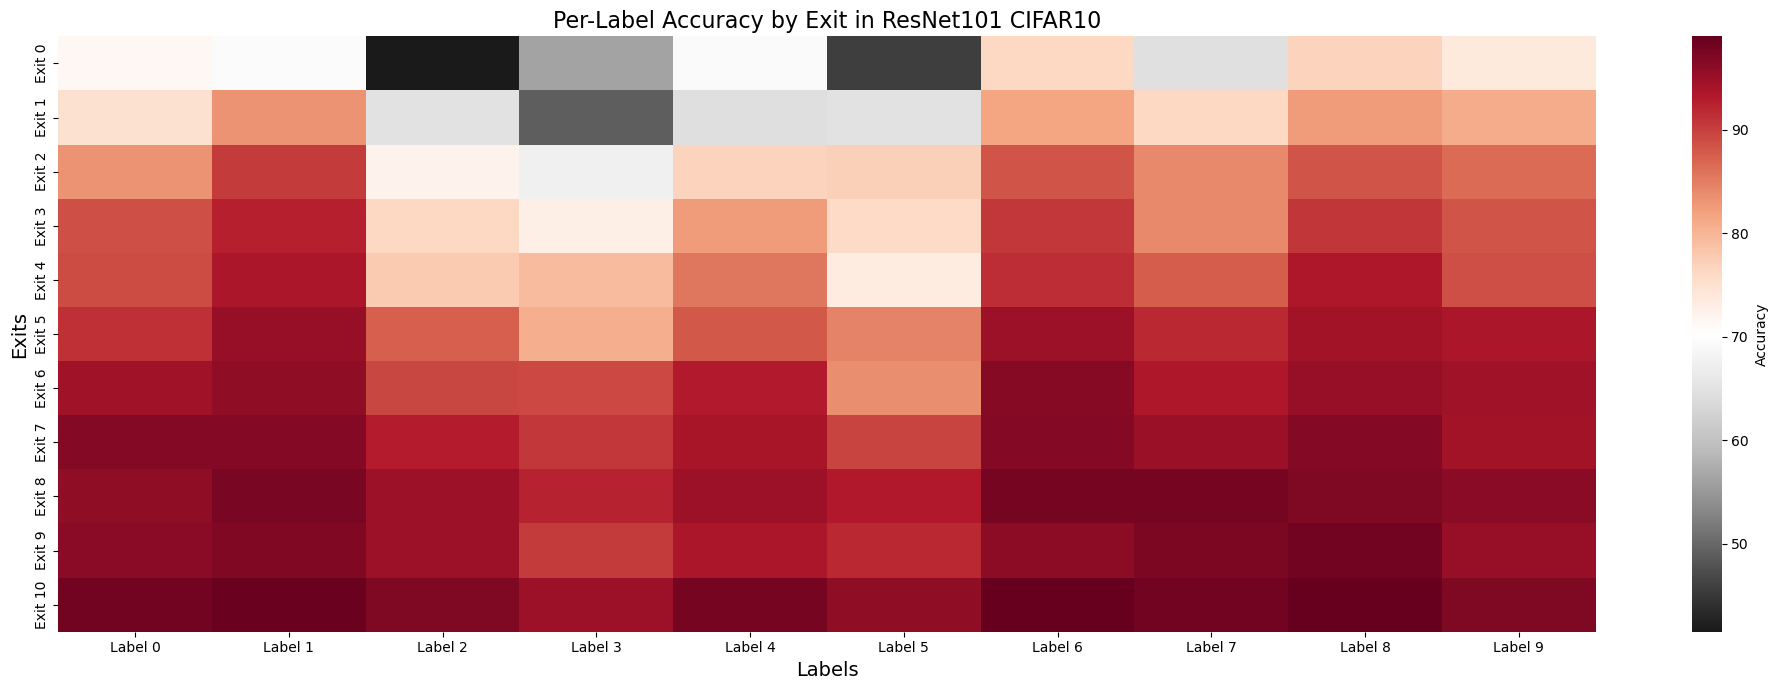

In [41]:
accuracy_matrix = cache_exp['exits_precision']
num_exits = 11
num_labels = dataset_outdim[data_choice]

# Heatmap 시각화
plt.figure(figsize=(20, 7))
sns.heatmap(
    accuracy_matrix,
    cmap="RdGy_r",      # 색상 스케일
    cbar_kws={'label': 'Accuracy'},  # 컬러바 레이블
    xticklabels=[f"Label {i}" for i in range(num_labels)],  # X축 라벨
    yticklabels=[f"Exit {i}" for i in range(num_exits)]     # Y축 라벨
)

# 그래프 제목과 축 레이블
plt.title(f"Per-Label Accuracy by Exit in {model_real_name[model_choice]} {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Exits", fontsize=14)
plt.tight_layout()

# 그래프 출력
plt.show()

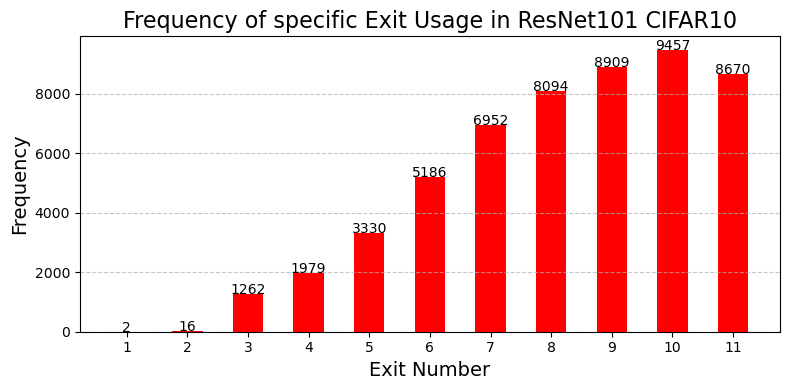

In [42]:
exits_data  = cache_exp['choosen_exit_distribution']

exit_ids = range(1,num_exits + 1)

# 각 출구가 선택된 횟수 계산
exit_counts = [0] * (len(exit_ids))
# for exits in exits_data:
#     exit_counts[len(exits) - 1] += 1
for exits in exits_data:
    for exit_id in exits:
        exit_counts[exit_id] += 1

# 막대 그래프 시각화
plt.figure(figsize=(8, 4))
plt.bar(exit_ids, exit_counts, color='red',  width= 0.5)

# 그래프 제목 및 축 레이블 설정
plt.title(f"Frequency of specific Exit Usage in {model_real_name[model_choice]} {data_real_name[data_choice]}", fontsize=16)
plt.xlabel("Exit Number", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# X축 눈금 설정
plt.xticks(exit_ids)

# 값 레이블 추가
for i, count in zip(exit_ids, exit_counts):
    plt.text(i, count + 2, str(count), ha='center', fontsize=10)

# 그래프 표시
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

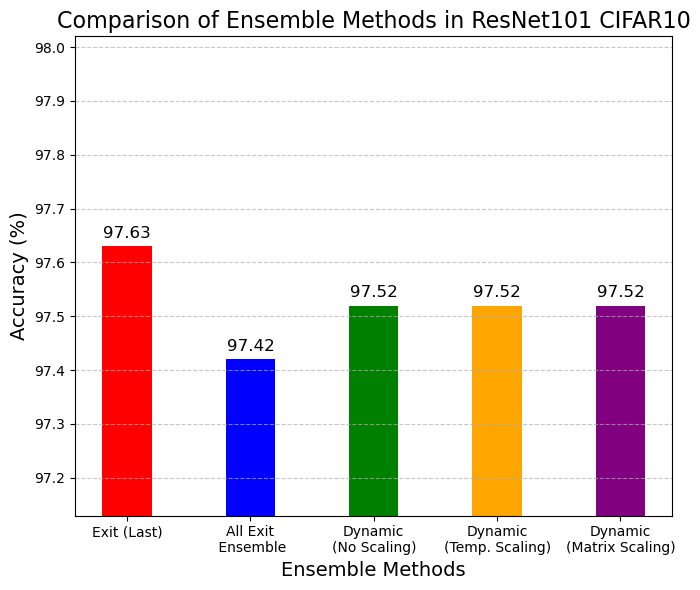

In [43]:
# Data: Ensemble methods and accuracies
methods = [
    'Exit (Last)',
    "All Exit\n Ensemble",
    "Dynamic\n(No Scaling)",
    "Dynamic\n(Temp. Scaling)",
    "Dynamic\n(Matrix Scaling)"
]
accuracies = [acc_dict[f'{model_choice}_{data_choice}'][-1], cache_exp['static_ensemble_acc'], cache_exp['Dynamic_No_Scaling'], cache_exp['Dynamic_TS_Scaling'], cache_exp['Dynamic_MS_Scaling']]
# Plot bar chart
plt.figure(figsize=(7, 6))
bars = plt.bar(methods, accuracies, width=0.4, color=["red", "blue", "green", "orange", "purple"], alpha=1,)

# Add data labels above bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{acc:.2f}", 
             ha='center', va='bottom', fontsize=12, color='black')

# Titles and labels
plt.title(f"Comparison of Ensemble Methods in {model_real_name[model_choice]} {data_real_name[data_choice]}", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xlabel("Ensemble Methods", fontsize=14)
plt.ylim(accuracies[0]-0.5, accuracies[-1]+0.5)  # Adjust Y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()